# Author : Viraj Sonar

# Technical Task 2 : Prediction using Unsupervised ML (Level - Beginner)

In this task, we are going to predict the optimum numbers of clusters from the given iris dataset and represent it visualy.This includes unsupervised learning. 

In [1]:
# Importing all the libraries needed in this notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

# Step 1 : Reading the Data-Set

In [2]:
# Loading and Reading the iris dataset
# Data available at the link - 'https://bit.ly/3kXTdox'

data = pd.read_csv("Iris.csv")

In [3]:
data.head() # Loads the first five rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail() # Loads the last five rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Checking for NaN values
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

NaN stands for not a number, is a numeric data type used to represent any value that is undefined or unpresentable.For example,0/0 is undefined as a real number and is,therefore represented by NaN. So, in this dataset, we don't have such values    

In [6]:
# Checking statistical description
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# Checking for unique classes in the dataset
data.Species.nunique()
data.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

# Step 2 : Data Visualization

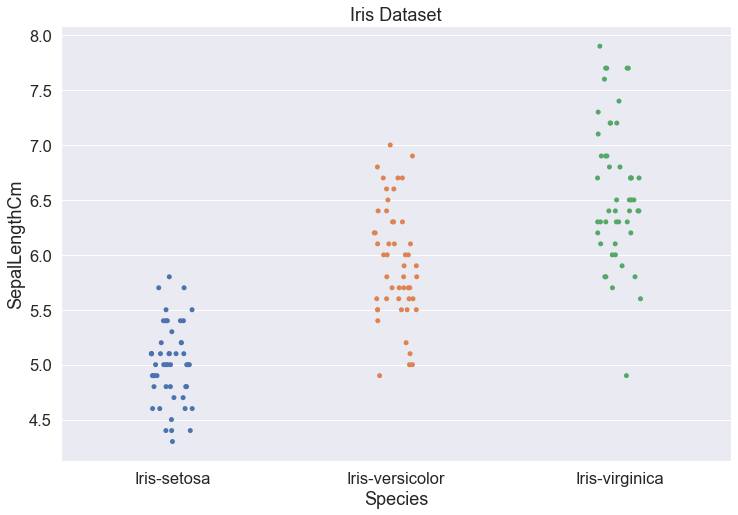

In [8]:
plt.figure(figsize= (12,8))
sns.set(font_scale=1.5)
sns.stripplot(x = "Species", y = "SepalLengthCm", data = data)
plt.title("Iris Dataset")
plt.show()
                    

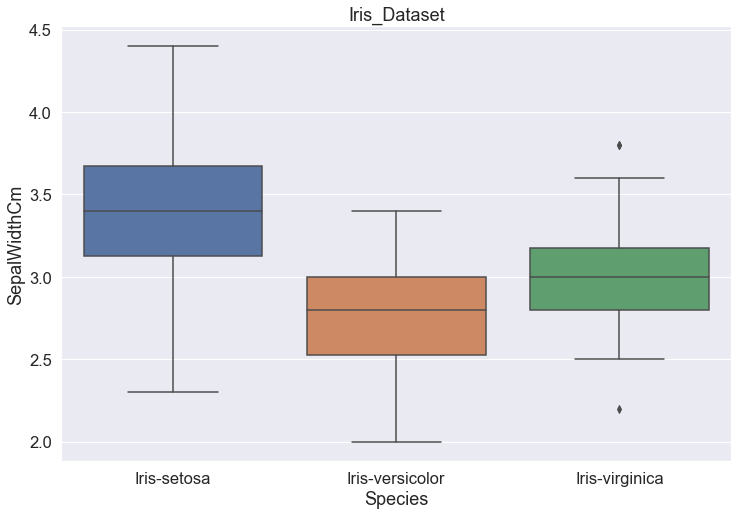

In [9]:
plt.figure(figsize= (12,8))
sns.set(font_scale=1.5)
sns.boxplot(x = "Species", y = "SepalWidthCm",data= data)
plt.title("Iris_Dataset")
plt.show()

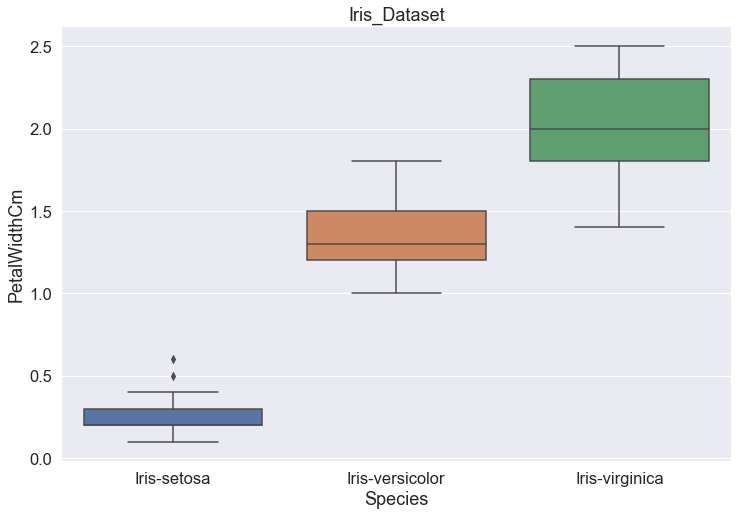

In [10]:
plt.figure(figsize= (12,8))
sns.set(font_scale=1.5)
sns.boxplot(x = "Species", y = "PetalWidthCm",data= data)
plt.title("Iris_Dataset")
plt.show()

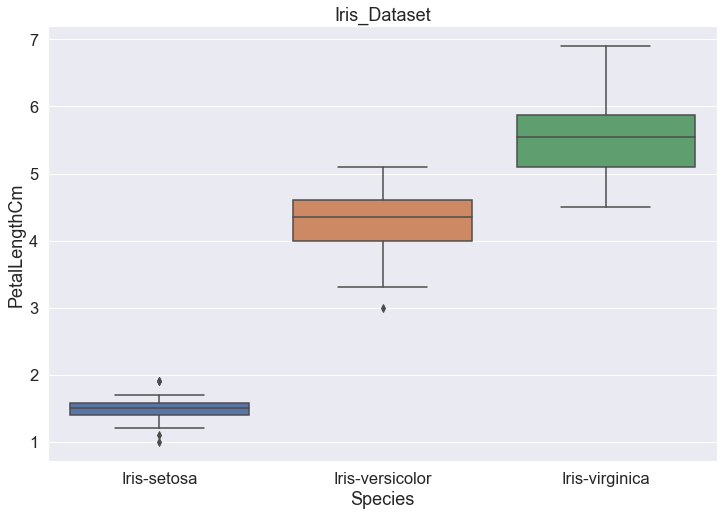

In [11]:
plt.figure(figsize= (12,8))
sns.set(font_scale=1.5)
sns.boxplot(x = "Species", y = "PetalLengthCm",data= data)
plt.title("Iris_Dataset")
plt.show()

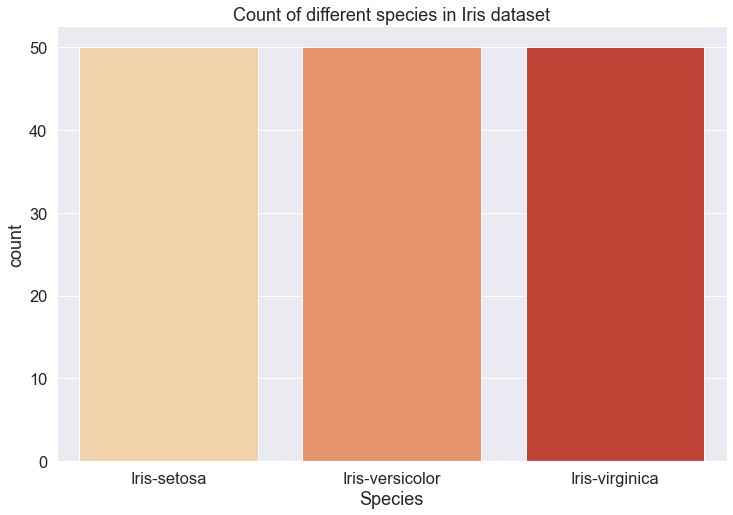

In [12]:
# Count plot
plt.figure(figsize= (12,8))
sns.set(font_scale=1.5)
sns.countplot(x = "Species", data= data, palette = "OrRd")
plt.title("Count of different species in Iris dataset")
plt.show()

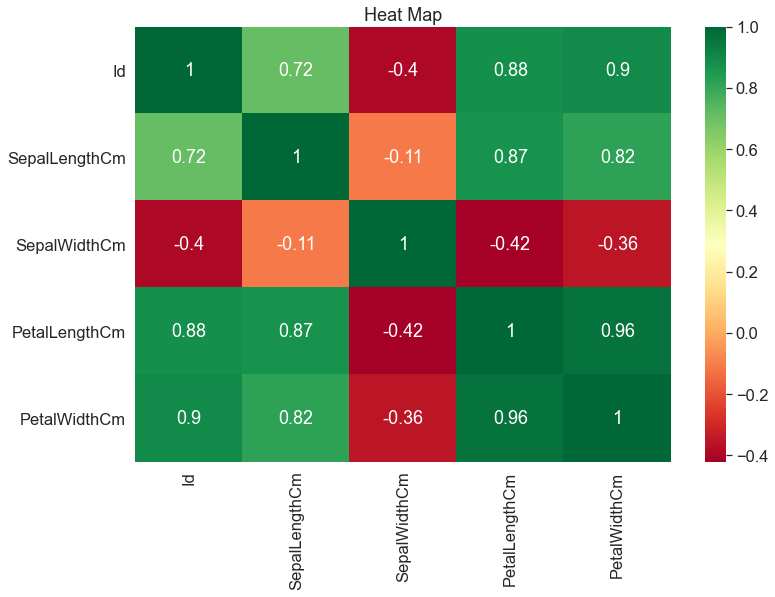

In [13]:
# Heat map
plt.figure(figsize= (12,8))
sns.set(font_scale=1.5)
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")
plt.title("Heat Map")
plt.show()

# Step 3 : Finding the optimum number of clusters using k-means clustering

In [14]:
# finding the optimum number of clusters using k-means

x = data.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',max_iter=300,n_init=10, random_state=0)
    kmeans.fit(x)
    ## appending the wcss to the list (kmeans.inertio_returns the wcss value for an initilized cluster )
    wcss.append(kmeans.inertia_)
    print('k:',i ,"wcss:",kmeans.inertia_)

k: 1 wcss: 281831.54466666654
k: 2 wcss: 70581.3808
k: 3 wcss: 31320.711199999994
k: 4 wcss: 17762.657226173542
k: 5 wcss: 11423.238080088988
k: 6 wcss: 7909.5306730769225
k: 7 wcss: 5881.448116883118
k: 8 wcss: 4562.780079365082
k: 9 wcss: 3579.7205612745106
k: 10 wcss: 2968.4914326653743


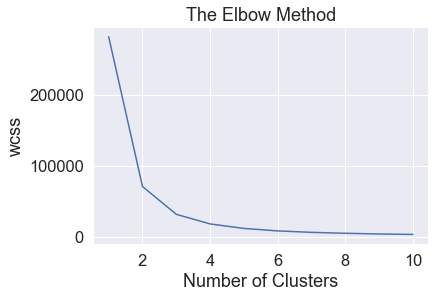

In [15]:
# plotting the results onto a line graph, allowing us to observe 'The Elbow'

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

We can see that after 3 the drop in wcss is minimal.So we choose 3 as the optimal no of clusters.

# Step 4 : Initializing k-means with optimum number of clusters

In [16]:
# Fitting K-Means to the Dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# Returns a label for each data point based on the number of clusters
y_kmeans = kmeans.fit_predict(x)

# Step 5 : Predicting Values

In [17]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Step 6 : Visualizing the Clusters

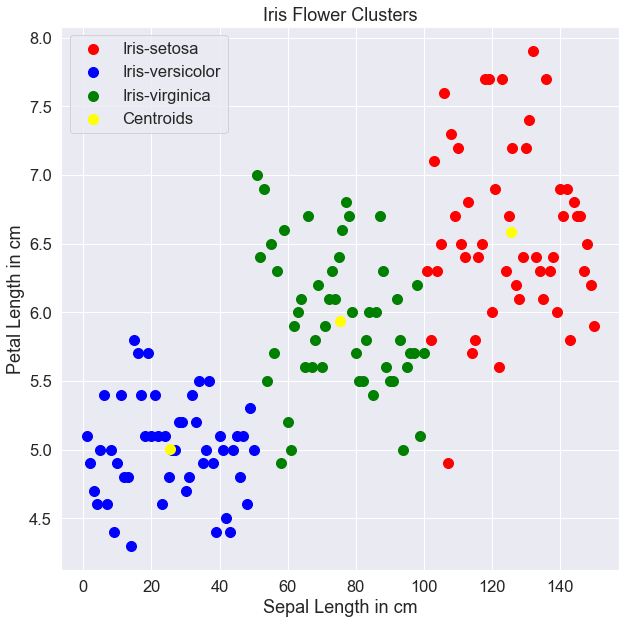

In [18]:
# Visualizing the Clusters
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolor')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Iris-virginica')

#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()


